# Word Representation

### One Hot Vector를 통한 출력

In [2]:
from eunjeon import Mecab

qna_data = [
            ['안녕', '만나서 반가워'],
            ['넌 누구니', '나는 AI 봇이란다.'],
            ['피자 주문 할께', '음료도 주문해줘'],
            ['음료는 뭘로', '콜라로 해줘']
            ]
mecab = Mecab()

#list형을 한번에 mecab.morphs구문에 넣은 후 list형으로 뽑아낼 경우 단어별로 리스트 형태로 표현됨
train_data = list(map(lambda x : mecab.morphs(' '.join(x)), qna_data))

import itertools
train_data = list(itertools.chain.from_iterable(train_data))

print(list(train_data))

['안녕', '만나', '서', '반가워', '넌', '누구', '니', '나', '는', 'AI', '봇', '이', '란다', '.', '피자', '주문', '할께', '음료', '도', '주문', '해', '줘', '음료', '는', '뭘로', '콜라', '로', '해', '줘']


In [3]:
import numpy as np
bucket = np.zeros(len(train_data), dtype=np.float)

for word in train_data:
    bucket_temp = bucket.copy()
    np.put(bucket_temp, train_data.index(word), 1)
    print(bucket_temp)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 

## Word to Vector (By Gensim)
### W2V를 통해 출력해보자


In [4]:
from gensim.models import word2vec

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
train_data = [train_data]
print(train_data)

#word2vec관련 설명 https://ratsgo.github.io/natural%20language%20processing/2017/03/08/word2vec/
model = word2vec.Word2Vec(size=50, window=2, min_count=1)
model.build_vocab(train_data)
model.train(train_data, epochs=model.epochs, total_examples=model.corpus_count)

print("model check : {0}".format(model))


[['안녕', '만나', '서', '반가워', '넌', '누구', '니', '나', '는', 'AI', '봇', '이', '란다', '.', '피자', '주문', '할께', '음료', '도', '주문', '해', '줘', '음료', '는', '뭘로', '콜라', '로', '해', '줘']]
model check : Word2Vec(vocab=24, size=50, alpha=0.025)


In [6]:
import os
file_path = './model'
if not os.path.exists(file_path):
    os.makedirs(file_path)
model.save(file_path + '/w2v.bin')
model = word2vec.Word2Vec.load((file_path + '/w2v.bin'))
print("model loac check : {0}".format(model))


model loac check : Word2Vec(vocab=24, size=50, alpha=0.025)


In [7]:
print(model.wv.index2word)
vocab = list(model.wv.vocab)
X = model.wv[vocab]
print(X)

['는', '주문', '음료', '해', '줘', '안녕', '만나', '서', '반가워', '넌', '누구', '니', '나', 'AI', '봇', '이', '란다', '.', '피자', '할께', '도', '뭘로', '콜라', '로']
[[-0.00435469  0.00830175  0.00711976 ... -0.00168582  0.00941534
  -0.00741397]
 [ 0.00920985 -0.00654105 -0.00898819 ...  0.00864979 -0.0019371
   0.00691956]
 [ 0.00944027 -0.00801388 -0.0085934  ...  0.00385953 -0.00720871
  -0.00833234]
 ...
 [ 0.00017547 -0.00774027  0.00896395 ... -0.00411493  0.00198477
   0.00870827]
 [ 0.00505032 -0.00810839 -0.00527952 ...  0.00763208  0.0036762
   0.00571837]
 [-0.00797577 -0.00654643 -0.00391916 ...  0.00270625  0.00610296
   0.00159144]]


In [8]:
print(model.wv['안녕'])

[-0.00435469  0.00830175  0.00711976 -0.00878192 -0.00900302 -0.00359436
  0.00660294  0.00947429 -0.00961091 -0.00180959  0.00683162 -0.00474432
  0.00636585  0.00644916  0.00508435  0.00040352 -0.0047757   0.00829826
  0.00039104  0.00109652 -0.00465937  0.00494736  0.00268918 -0.00214377
  0.00637964  0.00474685 -0.00781708  0.00330535  0.0048704   0.00852641
 -0.00493407  0.0004748  -0.00438182 -0.00995835  0.00957996  0.00629554
 -0.0086183  -0.00048895  0.00022327 -0.00263796 -0.00494358 -0.00639374
  0.00838539 -0.00153366 -0.00123366  0.00406289 -0.00401897 -0.00168582
  0.00941534 -0.00741397]


In [9]:
result1 = model.wv.most_similar(positive='누구', negative='', topn=10)
print(result1)

[('만나', 0.31446850299835205), ('줘', 0.31035831570625305), ('음료', 0.2812746465206146), ('도', 0.23473703861236572), ('서', 0.2270154505968094), ('콜라', 0.21221858263015747), ('반가워', 0.1405995786190033), ('로', 0.12217938899993896), ('봇', 0.06303990632295609), ('이', -0.007553219795227051)]


C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


             x           y word
0   162.090668   12.374251    는
1    74.096825  -84.503860   주문
2    -0.785258   83.929993   음료
3     2.554003 -120.874794    해
4  -133.032043   -0.710797    줘
5   -80.653748   55.202503   안녕
6   188.884430  105.953087   만나
7   -75.983009 -121.232635    서
8   104.874840  -24.937435  반가워
9   -66.023933  -43.067799    넌
10   12.578217  -46.432404   누구
11   57.467659  404.817596    니
12  -37.340443  201.911407    나
13   54.075939   22.084700   AI
14  118.613747  165.997467    봇
15  -17.620419   15.154845    이
16  -66.568230  127.218262   란다
17   58.062496 -176.057663    .
18  134.134842 -133.842331   피자
19  119.290428   65.799637   할께
20   31.342388  167.388367    도
21  235.188049    6.781533   뭘로
22   64.727730  102.082825   콜라
23  183.529282  -72.136932    로


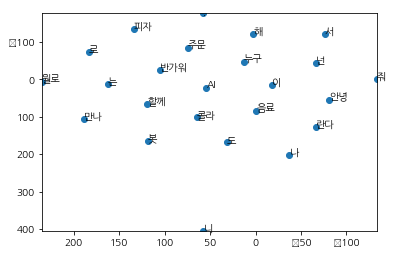

In [11]:
from sklearn.manifold import TSNE
import pandas as pd
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

font_location = "C:/Windows/Fonts/나눔고딕.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family="NanumGothic")

vocab = model.wv.index2word

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df = pd.concat([pd.DataFrame(X_tsne), pd.Series(vocab)], axis=1)

df.columns = ['x', 'y', 'word']
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

print(df)
ax.scatter(df['x'], df['y'])
ax.set_xlim(df['x'].max(), df['x'].min())
ax.set_ylim(df['y'].max(), df['y'].min())
for i, txt in enumerate(df['word']):
    ax.annotate(txt, (df['x'].iloc[i], df['y'].iloc[i]))
plt.show()